# Data Science and Big Data Analysis (COSC 5340)

# Prashant R. Ghimire (L20465640)

Background: There are 10 predictors, all quantitative, and a binary dependent variable, indicating the presence or absence of breast cancer. The predictors are anthropometric data and parameters which can be gathered in routine blood analysis. 

Attribute Information:

Quantitative Attributes: 
    1. Age (years) 
    2. BMI (kg/m2) 
    3. Glucose (mg/dL) 
    4. Insulin (µU/mL) 
    5. HOMA 
    6. Leptin (ng/mL) 
    7. Adiponectin (µg/mL) 
    8. Resistin (ng/mL) 
    9. MCP-1(pg/dL) 

Labels: 
    1=Healthy controls 
    2=Patients

Since the data contains no missing information and all the attributes are of the datatype 'integer' or 'float', no preprocessing was performed on this dataset. Although this dataset does require preprocessing, due to the time constraint I couldn't peform it.

In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [170]:
from pylab import rcParams
import seaborn as sb

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from collections import Counter

from sklearn.preprocessing import StandardScaler

In [171]:
data = pd.read_csv("data.csv")

In [172]:
#Gives the total number of objects and the attributes

data.shape

(116, 10)

In [173]:
#Gives the data types of the attributes

data.dtypes

Age                 int64
BMI               float64
Glucose             int64
Insulin           float64
HOMA              float64
Leptin            float64
Adiponectin       float64
Resistin          float64
MCP.1             float64
Classification      int64
dtype: object

In [174]:
#Gives the sample of the table from the top

data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [175]:
#Gives the sample of the table from the bottom

data.tail()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
111,45,26.85,92,3.33,0.755688,54.68,12.10,10.96,268.23,2
112,62,26.84,100,4.53,1.117400,12.45,21.42,7.32,330.16,2
113,65,32.05,97,5.73,1.370998,61.48,22.54,10.33,314.05,2
114,72,25.59,82,2.82,0.570392,24.96,33.75,3.27,392.46,2
115,86,27.18,138,19.91,6.777364,90.28,14.11,4.35,90.09,2


In [176]:
data_col1 = data['Age']

data_col2 = data['BMI']

data_col3 = data['Glucose']

data_col4 = data['Insulin']

data_col5 = data['HOMA']

data_col6 = data['Leptin']

data_col7 = data['Adiponectin']

data_col8 = data['Resistin']

data_col9 = data['MCP.1']

In [177]:
new_data = pd.DataFrame(data)

new_data = new_data.drop("Classification",axis=1)

print new_data

     Age        BMI  Glucose  Insulin       HOMA   Leptin  Adiponectin  \
0     48  23.500000       70    2.707   0.467409   8.8071     9.702400   
1     83  20.690495       92    3.115   0.706897   8.8438     5.429285   
2     82  23.124670       91    4.498   1.009651  17.9393    22.432040   
3     68  21.367521       77    3.226   0.612725   9.8827     7.169560   
4     86  21.111111       92    3.549   0.805386   6.6994     4.819240   
5     49  22.854458       92    3.226   0.732087   6.8317    13.679750   
6     89  22.700000       77    4.690   0.890787   6.9640     5.589865   
7     76  23.800000      118    6.470   1.883201   4.3110    13.251320   
8     73  22.000000       97    3.350   0.801543   4.4700    10.358725   
9     75  23.000000       83    4.952   1.013839  17.1270    11.578990   
10    34  21.470000       78    3.469   0.667436  14.5700    13.110000   
11    29  23.010000       82    5.663   1.145436  35.5900    26.720000   
12    25  22.860000       82    4.090 

In [178]:
kmeans_model = KMeans(n_clusters=3)
kmeans_model.fit(new_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [179]:
# Set the size of the plot
plt.figure(figsize=(15,10))

colors = np.array(['red', 'green', 'blue'])

<Figure size 1080x720 with 0 Axes>

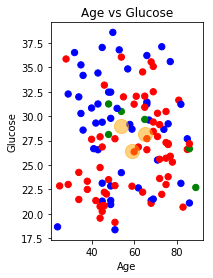

In [180]:
# Age vs Glucose

plt.subplot(1, 2, 1)
plt.scatter(data_col1, data_col2,c=[colors[i] for i in kmeans_model.labels_],  s=40)
plt.title('Age vs Glucose')
plt.xlabel('Age')
plt.ylabel('Glucose')

#Define the centers of the clusters    
centers = kmeans_model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='orange', s=200, alpha=0.5)

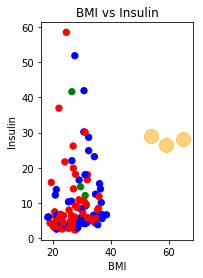

In [181]:
# BMI vs Insulin

plt.subplot(1, 2, 2)
plt.scatter(data_col2, data_col4, c=[colors[i] for i in kmeans_model.labels_],  s=40)
plt.title('BMI vs Insulin')
plt.xlabel('BMI')
plt.ylabel('Insulin')
   
centers = kmeans_model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='orange', s=200, alpha=0.5)
 
plt.show()

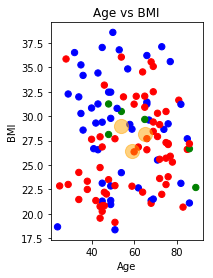

In [182]:
# Age vs BMI

plt.subplot(1, 2, 2)
plt.scatter(data_col1, data_col2, c=[colors[i] for i in kmeans_model.labels_],  s=40)
plt.title('Age vs BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
   
centers = kmeans_model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='orange', s=200, alpha=0.5)

In [183]:
kmeans_model = KMeans(n_clusters=5)
kmeans_model.fit(new_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [184]:
# Set the size of the plot
plt.figure(figsize=(15,10))

colors = np.array(['red', 'green', 'blue','pink','black'])

<Figure size 1080x720 with 0 Axes>

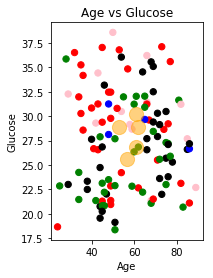

In [185]:
# Age vs Glucose

plt.subplot(1, 2, 1)
plt.scatter(data_col1, data_col2,c=[colors[i] for i in kmeans_model.labels_],  s=40)
plt.title('Age vs Glucose')
plt.xlabel('Age')
plt.ylabel('Glucose')

#Define the centers of the clusters    
centers = kmeans_model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='orange', s=200, alpha=0.5)

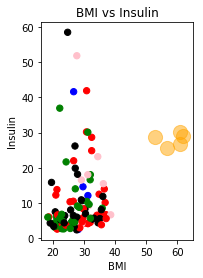

In [186]:
# BMI vs Insulin

plt.subplot(1, 2, 2)
plt.scatter(data_col2, data_col4, c=[colors[i] for i in kmeans_model.labels_],  s=40)
plt.title('BMI vs Insulin')
plt.xlabel('BMI')
plt.ylabel('Insulin')
   
centers = kmeans_model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='orange', s=200, alpha=0.5)
 
plt.show()

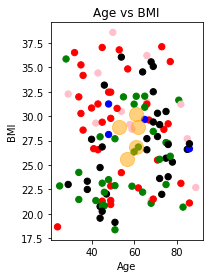

In [187]:
# Age vs BMI

plt.subplot(1, 2, 2)
plt.scatter(data_col1, data_col2, c=[colors[i] for i in kmeans_model.labels_],  s=40)
plt.title('Age vs BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
   
centers = kmeans_model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='orange', s=200, alpha=0.5)

In [188]:
kmeans_model = KMeans(n_clusters=1)
kmeans_model.fit(new_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [189]:
# Set the size of the plot
plt.figure(figsize=(15,10))

colors = np.array(['blue'])

<Figure size 1080x720 with 0 Axes>

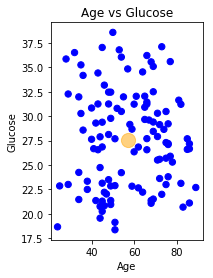

In [190]:
# Age vs Glucose

plt.subplot(1, 2, 1)
plt.scatter(data_col1, data_col2,c=[colors[i] for i in kmeans_model.labels_],  s=40)
plt.title('Age vs Glucose')
plt.xlabel('Age')
plt.ylabel('Glucose')

#Define the centers of the clusters    
centers = kmeans_model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='orange', s=200, alpha=0.5)

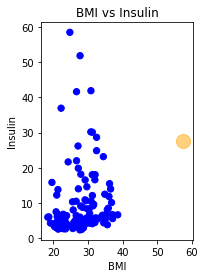

In [191]:
# BMI vs Insulin

plt.subplot(1, 2, 2)
plt.scatter(data_col2, data_col4, c=[colors[i] for i in kmeans_model.labels_],  s=40)
plt.title('BMI vs Insulin')
plt.xlabel('BMI')
plt.ylabel('Insulin')
   
centers = kmeans_model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='orange', s=200, alpha=0.5)
 
plt.show()

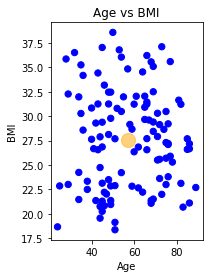

In [192]:
# Age vs BMI

plt.subplot(1, 2, 2)
plt.scatter(data_col1, data_col2, c=[colors[i] for i in kmeans_model.labels_],  s=40)
plt.title('Age vs BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
   
centers = kmeans_model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='orange', s=200, alpha=0.5)

In [193]:
new_data1 = pd.DataFrame(data)

new_data1 = new_data1.drop("Classification",axis=1)

print new_data1

     Age        BMI  Glucose  Insulin       HOMA   Leptin  Adiponectin  \
0     48  23.500000       70    2.707   0.467409   8.8071     9.702400   
1     83  20.690495       92    3.115   0.706897   8.8438     5.429285   
2     82  23.124670       91    4.498   1.009651  17.9393    22.432040   
3     68  21.367521       77    3.226   0.612725   9.8827     7.169560   
4     86  21.111111       92    3.549   0.805386   6.6994     4.819240   
5     49  22.854458       92    3.226   0.732087   6.8317    13.679750   
6     89  22.700000       77    4.690   0.890787   6.9640     5.589865   
7     76  23.800000      118    6.470   1.883201   4.3110    13.251320   
8     73  22.000000       97    3.350   0.801543   4.4700    10.358725   
9     75  23.000000       83    4.952   1.013839  17.1270    11.578990   
10    34  21.470000       78    3.469   0.667436  14.5700    13.110000   
11    29  23.010000       82    5.663   1.145436  35.5900    26.720000   
12    25  22.860000       82    4.090 

In [194]:
dbscan = DBSCAN(eps=0.5)

In [195]:
model = DBSCAN(eps=0.05, min_samples=2).fit(new_data1)
print model

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=2, n_jobs=None, p=None)


In [196]:
outliers_df = pd.DataFrame(new_data1)

print Counter(model.labels_)

Counter({-1: 116})


In [197]:
stscaler = StandardScaler().fit(new_data1)
pimanp = stscaler.transform(new_data1)
dbscan.fit(new_data1)

/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=None, p=None)

In [198]:
plt.figure(figsize=(20,10))

colors = np.array(['red', 'green', 'blue'])

<Figure size 1440x720 with 0 Axes>

Text(0,0.5,'Glucose')

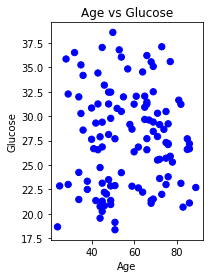

In [199]:
labels =  dbscan.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbscan.core_sample_indices_] = True
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

#Age vs Glucose
plt.subplot(1, 2, 1)
plt.scatter(data_col1, data_col2,c=[colors[i] for i in labels],  s=40)
plt.title('Age vs Glucose')
plt.xlabel('Age')
plt.ylabel('Glucose')